### Scaling Exercises
Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

#### 1) Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [11]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
import wrangle

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from scipy import stats
import sklearn.preprocessing


In [2]:
#read the SQL dataset into pandas Dataframe

df = pd.read_sql("SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt,  taxamount , fips FROM properties_2017 JOIN propertylandusetype USING (propertylandusetypeid)WHERE propertylandusetype.propertylandusedesc = 'Single Family Residential';", env.get_db_url('zillow'))

df = wrangle.wrangle_zillow(df)

In [3]:
df.head()

,Bedroom_Count,Bathroom_count,square_feet,Tax_Value,yearbuilt,Tax_amount,Fips_code
4,4.0,2.0,3633,296425.0,2005,6941.39,6037
6,3.0,4.0,1620,847770.0,2011,10244.94,6037
7,3.0,2.0,2077,646760.0,1926,7924.68,6037
11,0.0,0.0,1200,5328.0,1972,91.60,6037
14,0.0,0.0,171,6920.0,1973,255.17,6037


In [20]:
x = df[['Bedroom_Count','Bathroom_count','square_feet','Tax_Value']]

#Have not yet created a split, so will do so here:
x_train_and_validate, x_test = train_test_split(x, random_state=123)
x_train, x_validate = train_test_split(x_train_and_validate)

<i> MIN-MAX SCALING:

Text(0.5, 1.0, 'Scaled')

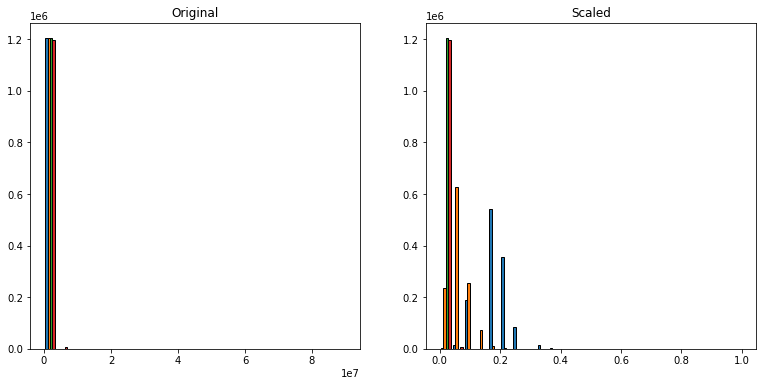

In [21]:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

_________________________________________________________________________

<i> STANDARD SCALER:

Text(0.5, 1.0, 'Scaled')

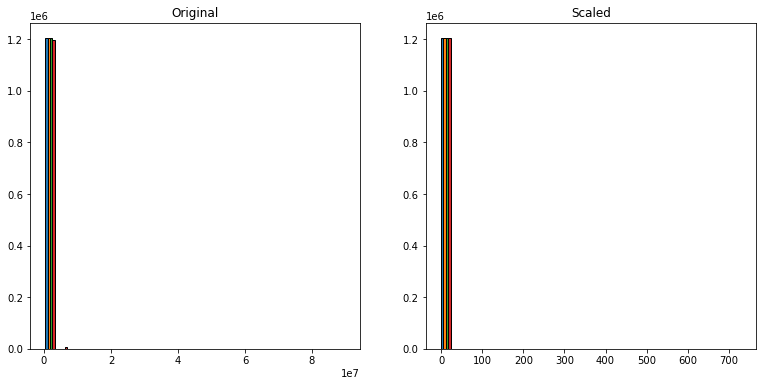

In [29]:
#dividing each data point by the standard deviation:
s_scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
s_scaler.fit(x_train)

x_train_scaled = s_scaler.transform(x_train)
x_validate_scaled = s_scaler.transform(x_validate)
x_test_scaled = s_scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')


<i> ROBUSTSCALER:

Text(0.5, 1.0, 'Scaled')

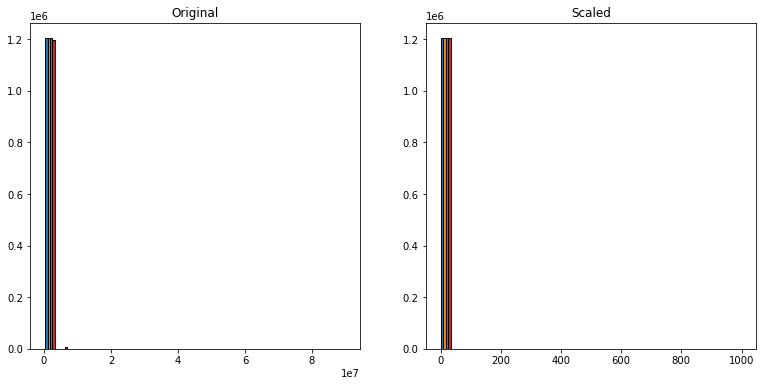

In [28]:
rob_scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
rob_scaler.fit(x_train)

x_train_scaled = rob_scaler.transform(x_train)
x_validate_scaled = rob_scaler.transform(x_validate)
x_test_scaled = rob_scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

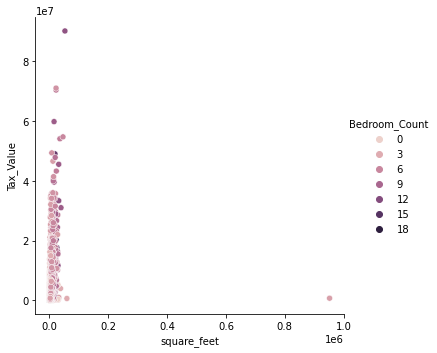

In [25]:
#what's going on with the data?
sns.relplot(data=x_train, y='Tax_Value', x='square_feet', hue='Bedroom_Count')

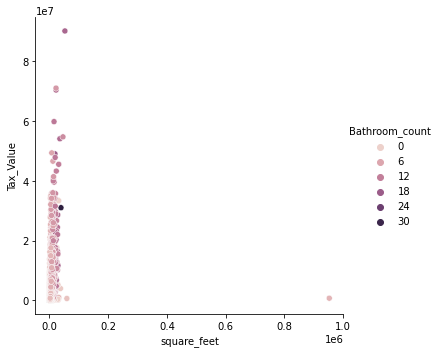

In [33]:
#what's going on with the data?
sns.relplot(data=x_train, y='Tax_Value', x='square_feet', hue='Bathroom_count')

#### 2) Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [35]:
s_scaler.inverse_transform(x, copy=None)

array([[7.02858193e+00, 4.22303905e+00, 4.72526258e+06, 2.01062894e+11],
       [6.09667701e+00, 6.20531342e+00, 2.10808596e+06, 5.75035288e+11],
       [6.09667701e+00, 4.22303905e+00, 2.70224876e+06, 4.38691999e+11],
       ...,
       [7.02858193e+00, 6.70088202e+00, 4.06739305e+06, 3.63605855e+11],
       [6.09667701e+00, 4.71860764e+00, 2.56833461e+06, 2.87835315e+11],
       [7.02858193e+00, 6.20531342e+00, 2.74515330e+06, 3.75779823e+11]])

#### 3) Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

#### 4) Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

#### 5) Based on the work you've done, choose a scaling method for your dataset. 

Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. 

Be sure to only learn the parameters for scaling from your training data!